# Cálculo de la base de Fourier clásica de frecuencias


⚫ TODO: Demostrar que $\mathcal{B}_{n}$ es una BON de $\mathbb{C}^{n}$
y, en base a esto, que $\mathcal{F}_{n}$ es una BON de $\mathbb{R}^{n}$.

⚫ TODO: Optimiza el código usando las simetrías de las funciones seno y coseno.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pylab
from tqdm import tqdm
from numpy.linalg import norm


pi=math.pi
mpl.rcParams.update(mpl.rcParamsDefault)
colores=['red', 'blue', 'darkviolet', 'gray', 'hotpink']

In [ ]:
#Funciones auxiliares

def escXarr(a,x):
  """
  'x' es un array, 'n' es de tipo int o float.
  Se regresa un array cuya i-ésima entrada es n*x[i]
  """
  resultado=[] #inicializamos el array
  for entrada in x: #iteramos en el array x
    resultado.append(a*entrada)
  return resultado

def sumando_arrays(x,y):
  """
  'x' y 'y' son ambos de tipo array de la misma longitud.
  Esta función regresa un array cuya i-ésima entrada es X[i]+y[i].
  """
  resultado=[]
  for i in range(len(x)):
    resultado.append(x[i]+y[i])
  return resultado


In [ ]:
#pruebas
x=[1,-2,5]
y=[0,3,1]

print(sumando_arrays(x,y))

[1, 1, 6]


▶ Programando la base
$$
\mathcal{B}_{n}:= \{ e_{w}:= \left( \frac{1}{n} e^{2 \pi i w \frac{k}{n} i}  \right)_{0 \leq k \leq n-1} : \hspace{0.4cm} 0 \leq w \leq n-1 \}
$$

de $\mathbb{C}^{n}$. 

In [ ]:
#Funciones coseno y coseno a partir de las que se construye todo lo que sigue.

def c_w(n,t, w):
  return math.sqrt(1/n)*np.cos(2*pi*w*t)

def s_w(n,t, w):
  return math.sqrt(1/n)*np.sin(2*pi*w*t)

In [ ]:
def base_Bn(n):
  dominio=[k/n for k in range(n)]
  Bn=[[  complex(c_w(n, t,0),0) for t in dominio]] #creamos la base, agregando el primer vector.

  for w in range(1,n): #iteramos en la variable de frecuencia
    cosenos=[] #aquí almacenamos las partes reales de la base Bn
    senos=[] #y aquí las imaginarias.
    for t in dominio:
      cosenos.append(c_w(n, t, w))
      senos.append(s_w(n, t, w))
    vector=[]
    #juntamos las partes reales e imaginarias para formar las entradas de 'vector'
    for i in range(n):
      vector.append(complex(cosenos[i], senos[i]))
    #Agregamos el vector a la base
    Bn.append(vector)

  return Bn


▶ Explicando gráficamente cómo se construye $\mathcal{B}_{n}$.
Siempre piense a $w$ como el parámetro de frecuencia.

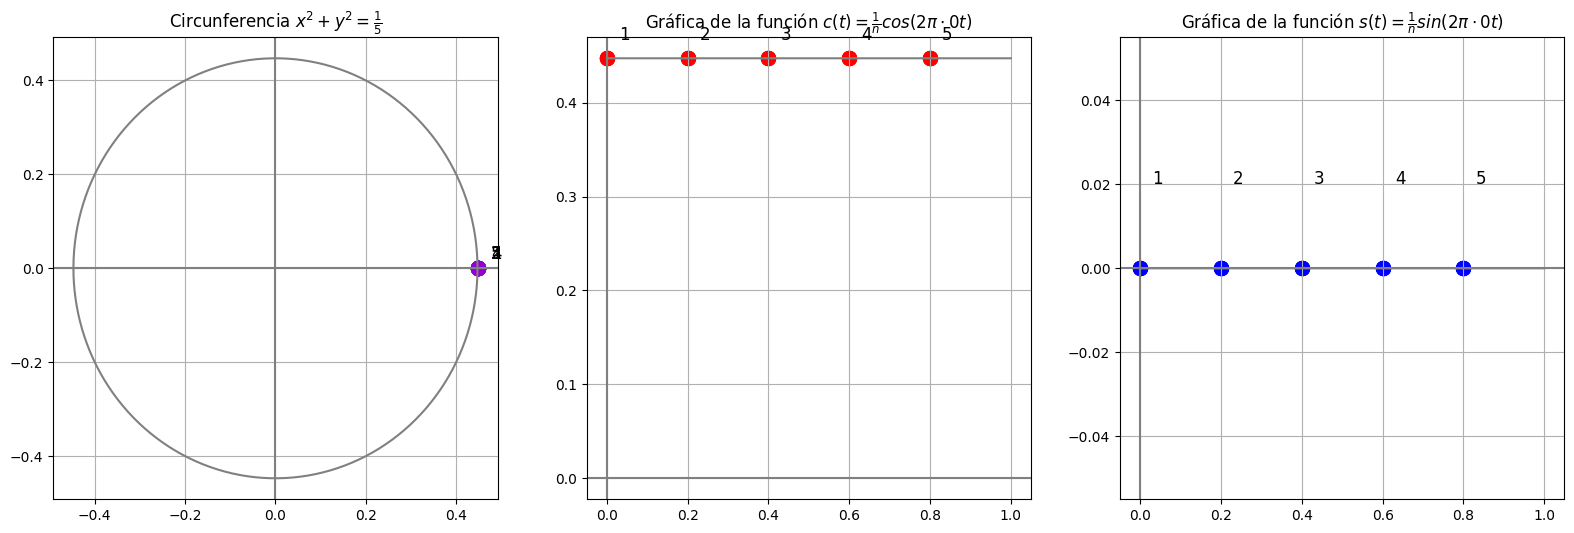

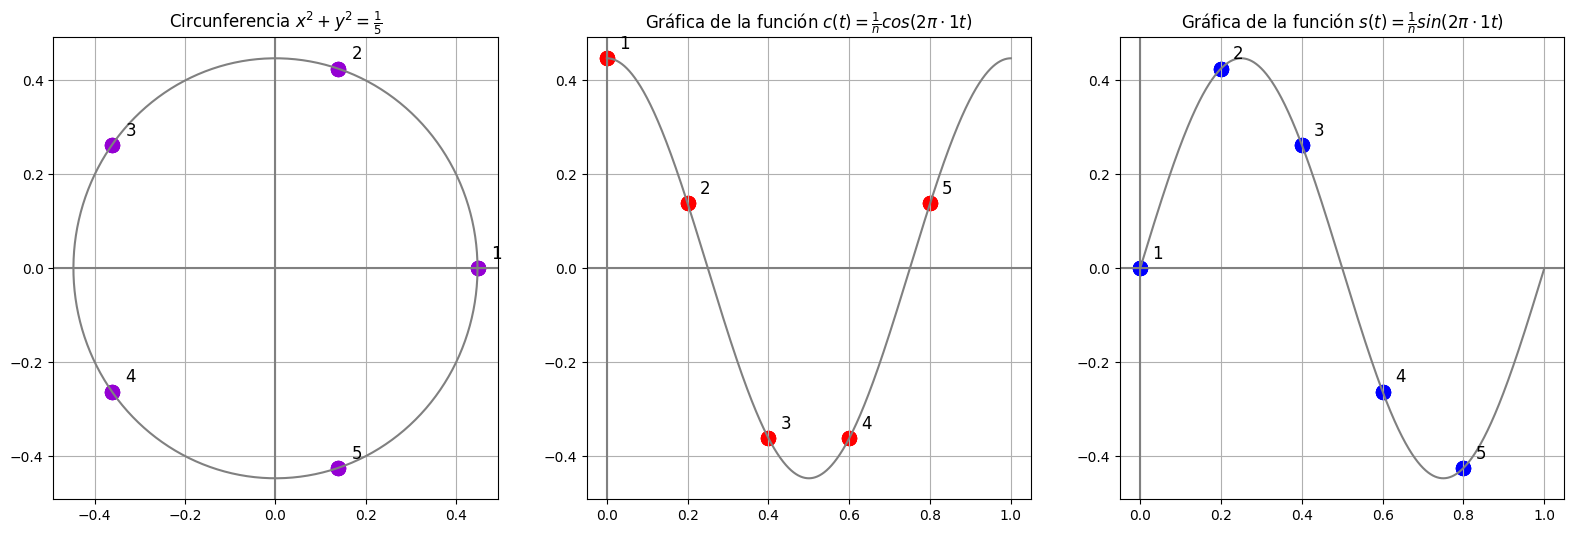

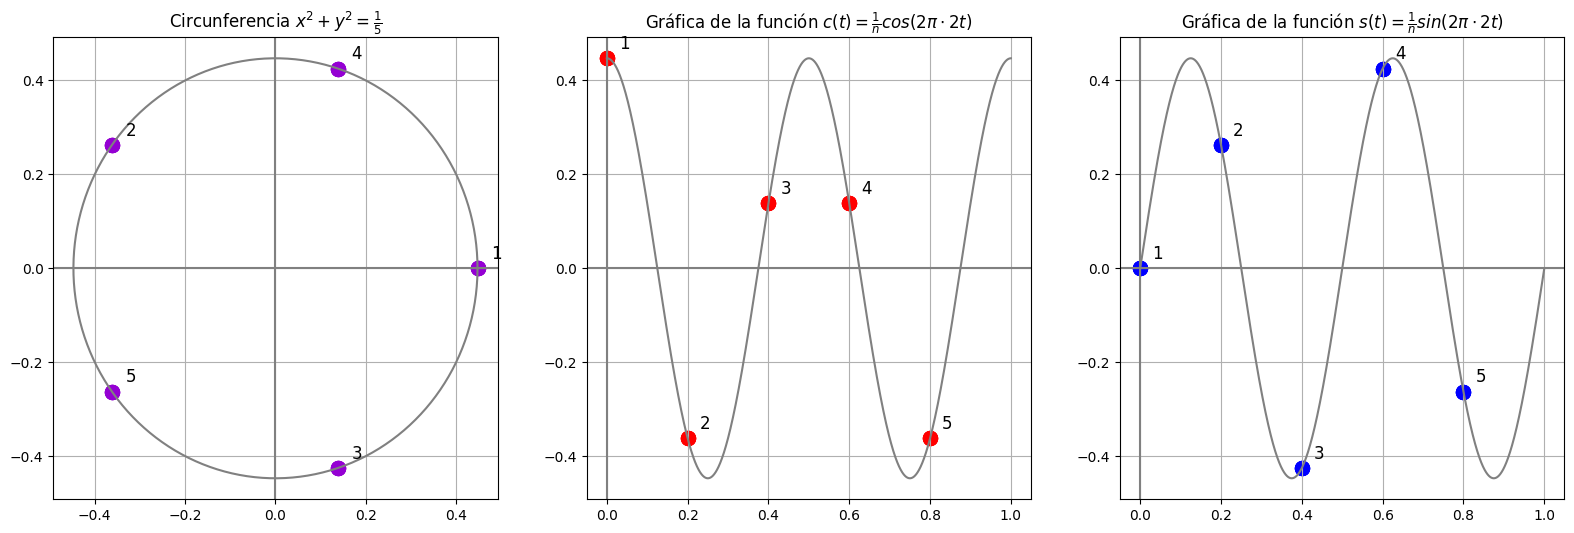

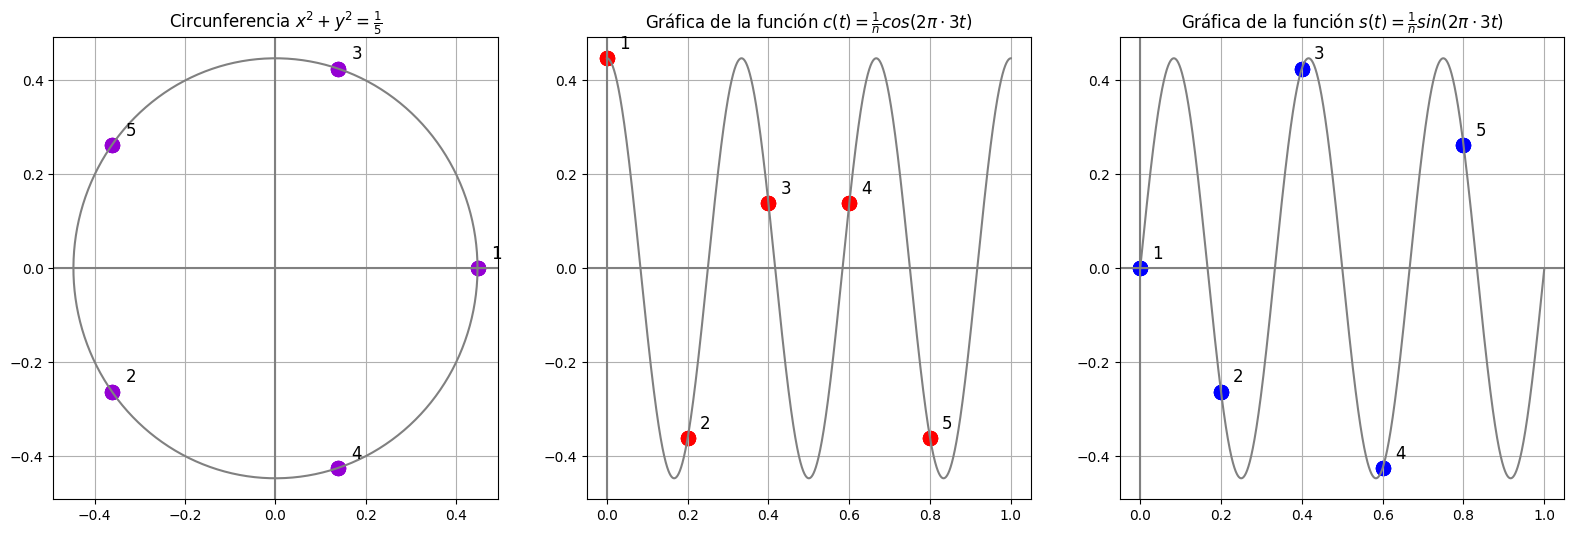

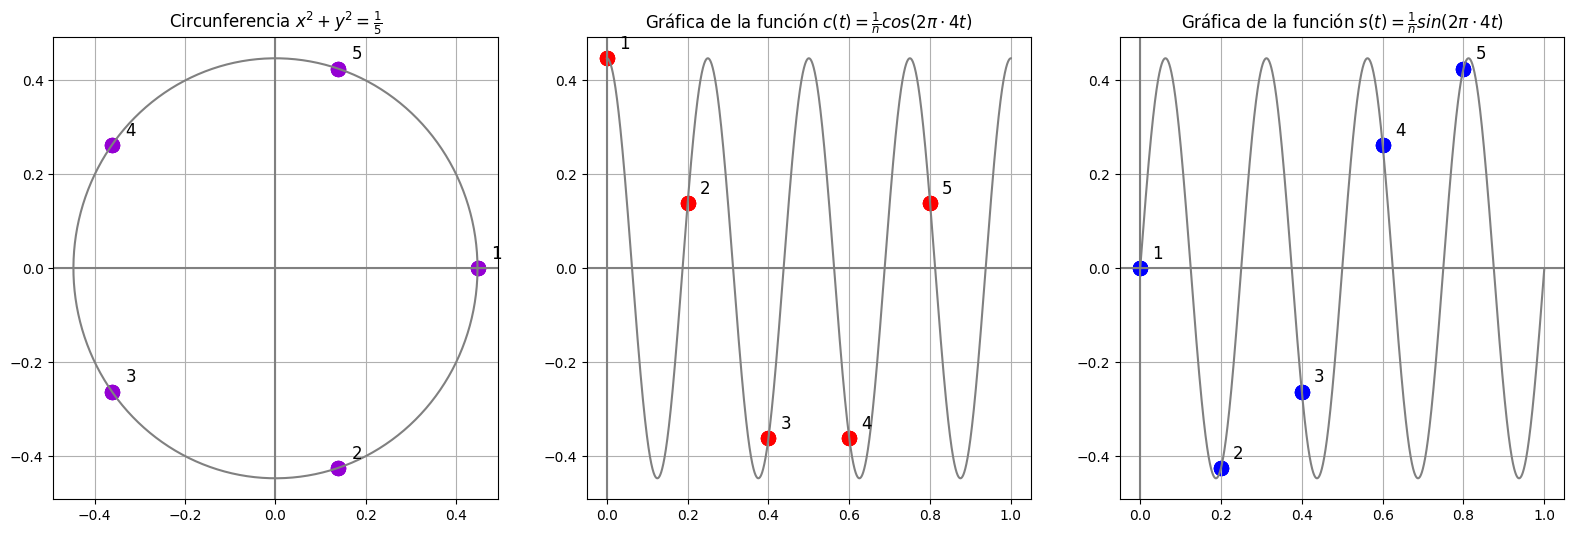

In [ ]:
def construccion_grafica_Bn(n, w):
  """
  'n' y 'w' son ambas variables de tipo int.
  'n' es la dimensión del espacio Cn y 'w' \in \{ 0, ... , n-1 \} es la frecuencia.
  """

  fig, axis= plt.subplots(1,3)
  fig.set_size_inches(19.5, 6)

  X=np.arange(0, 1, 0.0001)
  t = np.linspace(0, 2 * np.pi, 500)


  dominio=[k/n for k in range(n)]
  texto=[str(t) for t in range(1,n+1)]
  puntos_coseno=[c_w(n,t, w) for t in dominio]
  puntos_seno=[s_w(n,t, w) for t in dominio]


  axis[0].plot(1/math.sqrt(n)*np.cos(t), 1/math.sqrt(n)*np.sin(t), color=colores[3])
  axis[0].set_title(r'Circunferencia $x^{{2}}+y^{{2}}= \frac{{1}}{{ {0} }}$'.format(str(n)))

  axis[1].plot(X, c_w(n, X, w),color=colores[3])
  axis[1].set_title(r'Gráfica de la función $c(t)=\frac{{1}}{{n}}cos(2 \pi \cdot {{{0}}} t)$'.format(str(w)))

  axis[2].plot(X, s_w(n, X,w),color=colores[3])
  axis[2].set_title(r'Gráfica de la función $s(t)=\frac{{1}}{{n}}sin(2 \pi \cdot {{{0}}} t)$'.format(str(w)))


  for i in range(n):
    axis[0].scatter(puntos_coseno, puntos_seno, color=colores[2], s=100)
    axis[1].scatter(dominio, puntos_coseno, color=colores[0], s=100)
    axis[2].scatter(dominio, puntos_seno, color=colores[1], s=100)

  for i in range(n):
    axis[0].text(puntos_coseno[i]+.03, puntos_seno[i]+.02, texto[i], fontsize=12)
    axis[1].text(dominio[i]+.03, puntos_coseno[i]+.02, texto[i], fontsize=12)
    axis[2].text(dominio[i]+.03, puntos_seno[i]+.02, texto[i], fontsize=12)

  for i in range(3):
    axis[i].axhline(y=0, color='gray')
    axis[i].axvline(x=0, color='gray')
    axis[i].grid(True)

  plt.show()

for i in range(5):
  construccion_grafica_Bn(5,i)

▶ Comprobando numéricamente que $\mathcal{B}_{n}$ es una BON de $\mathbb{C}^{n}$.


El producto punto $< , >: \mathbb{C}^{n} \times \mathbb{C}^{n} \longrightarrow \mathbb{C}$ que estamos considerando en el 
$\mathbb{C}-$ espacio vectorial $\mathbb{C}^{n}$ es el canónico, definido como

$$
< a, b>= \sum_{k=0}^{n-1}(a_{k} * \overline{b_{k}}), 
$$
donde $a=(a_{0}, \cdots , a_{n-1}), b=(b_{0}, \cdots , b_{n-1})\in \mathbb{C}^{n}$, * denota la multiplicación compleja y por $\overline{z}$ denotamos
el conjugado complejo.


La norma que de este producto punto se deriva es pues
$$
||(z_{1}, \cdots , z_{n})||= \sqrt{|z_{1}|^{2}+\ldots + |z_{n}|^{2}},
$$
donde $|z_{i}|$ es el módulo del número complejo $z_{i} \in \mathbb{C}$.

In [ ]:
def productoPunto_Cn(z1,z2):
  suma=0
  for i in range(len(z1)):
    suma+=z1[i]*z2[i].conjugate()
  return suma



base=base_Bn(5)
for i in range(5):
  for j in range(5):
    print(productoPunto_Cn(base[i], base[j]))
  print('----------------------')

(0.9999999999999999+0j)
(-6.938893903907228e-18+0j)
-6.938893903907228e-17j
-6.938893903907228e-17j
(1.1796119636642288e-16-1.3877787807814457e-16j)
----------------------
(-6.938893903907228e-18+0j)
(0.9999999999999998+0j)
(-4.85722573273506e-17+2.7755575615628914e-17j)
-4.163336342344337e-17j
(2.7755575615628914e-17-5.551115123125783e-17j)
----------------------
6.938893903907228e-17j
(-4.85722573273506e-17-2.7755575615628914e-17j)
(0.9999999999999998+0j)
(-8.326672684688674e-17+0j)
(-2.7755575615628914e-17-8.326672684688674e-17j)
----------------------
6.938893903907228e-17j
4.163336342344337e-17j
(-8.326672684688674e-17+0j)
(1+0j)
(-4.163336342344337e-17+5.551115123125783e-17j)
----------------------
(1.1796119636642288e-16+1.3877787807814457e-16j)
(2.7755575615628914e-17+5.551115123125783e-17j)
(-2.7755575615628914e-17+8.326672684688674e-17j)
(-4.163336342344337e-17-5.551115123125783e-17j)
(0.9999999999999999+0j)
----------------------


▶ Programando a la BON 
$\mathcal{F}_{n}$ de $\mathbb{R}^{n}$. La definición de esta base es como sigue:



* Si $n$ es impar, digamos, $n=2M-1$, 
$$
\mathcal{F}_{n}= \{ c_{0}^{n}, c_{1}^{n}, s_{1}^{n}, \ldots , c_{M-1}^{n},
s_{M-1}^{n}  \},
$$
y
*  si $n$ es par, digamos, $n=2M$, 
$$
\mathcal{F}_{n}= \{ c_{0}^{n}, c_{1}^{n}, s_{1}^{n}, \ldots , c_{M-1}^{n},
s_{M-1}^{n} , c_{M}^{n} \}.
$$


En cualquier caso, $M=\lceil \frac{n}{2} \rceil$.





⚫ TODO: parece que suponiendo que $\mathcal{B}_{n}$ es BON del $\mathbb{C}$-
espacio vectorial $\mathcal{C}^{n}$ se deduce que $\mathcal{F}_{n}$ es BON de $\mathbb{R}^{n}$.

In [ ]:
def calculo_base(n): 
  dominio=[k/n for k in range(n)]
  M=math.ceil(n/2) #cota superior de las frecuencias consideradas en la base
  

  base_F=[(1/math.sqrt(n))*np.ones([n])] #inicializamos la base, que será un array. Ya incluimos la primera entrada.

  for w in range(1,M): #Nota que, a diferencia del caso complejo, el rango de frecuencia no tiene a 'n-1' como cota superior!
    f_w=[]
    g_w=[]
    for t in dominio:
      f_w.append(math.sqrt(2)*c_w(n, t, w))
      g_w.append(math.sqrt(2)*s_w(n, t, w))
    base_F.append(f_w)
    base_F.append(g_w)

  if n%2==1: #si N es impar, ya terminamos
    return base_F #Debemos multiplicar por \sqrt{2} para obtener elementos de Rn de norma uno
  else: #en caso contrario, falta agregar un vector con una frecuencia más alta
    f_w=[]
    for i in range(M):
      f_w.append(1/math.sqrt(n))
      f_w.append(-1/math.sqrt(n))
    base_F.append(f_w) #Nota que aquí no multiplicamos por \sqrt{2}
    return base_F


In [ ]:
print(calculo_base(5))

[array([0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136]), [0.6324555320336759, 0.19543950758485484, -0.5116672736016926, -0.5116672736016928, 0.19543950758485468], [0.0, 0.6015009550075456, 0.37174803446018456, -0.37174803446018445, -0.6015009550075457], [0.6324555320336759, -0.5116672736016926, 0.19543950758485468, 0.19543950758485498, -0.511667273601693], [0.0, 0.37174803446018456, -0.6015009550075457, 0.6015009550075456, -0.3717480344601843]]


In [ ]:
#comprobando numéricamente la ortonormalidad de las bases que resultan de la función 'calculo_base'

base_Fourier=calculo_base(5)

for i in range(5):
  for j in range(5):
    print(np.dot(base_Fourier[i], base_Fourier[j]))
  print('-------------------')




0.9999999999999999
-2.7755575615628914e-17
5.551115123125783e-17
0.0
1.3877787807814457e-16
-------------------
-2.7755575615628914e-17
1.0
9.71445146547012e-17
2.7755575615628914e-17
5.551115123125783e-17
-------------------
5.551115123125783e-17
9.71445146547012e-17
1.0
1.6653345369377348e-16
-1.1102230246251565e-16
-------------------
0.0
2.7755575615628914e-17
1.6653345369377348e-16
1.0
1.1102230246251565e-16
-------------------
1.3877787807814457e-16
5.551115123125783e-17
-1.1102230246251565e-16
1.1102230246251565e-16
1.0
-------------------


▶ Haciendo un análisis de frecuencia de señales de dimensión $n$, es decir. representando elementos de $\mathbb{R}^{n}$ en función de la base de frecuencias $\mathcal{F}_{n}$ calculada con la función 'calculo_base'

In [ ]:
#TODO: no pude reconstruir correctamente la señal.

def coeficientes_espectrales(x):
  """
  'x' es un array de dimensión (digamos, 'n') mayor a dos
  Se regresan los coeficientes de x respecto a la BON Fn de Rn separados en dos listas: 
  una correspondiente a los vectores cosenos, y otra a los vectores senos.
  """
  n=len(x)
  M=math.ceil(n/2)
  base_frecuencias=calculo_base(n)

  coef_cosenos=[np.dot(x, base_frecuencias[0])] #agregamos el primer coeficiente, que corresponde a un coseno.
  coef_senos=[]

  for i in range(M-1):
    coef_senos.append(np.dot(x, base_frecuencias[2*i+2]))
    coef_cosenos.append(np.dot(x, base_frecuencias[2*i+1]))

  if n%2==0:
    coef_cosenos.append(np.dot(x, base_frecuencias[n-1]))

  return (coef_cosenos, coef_senos)

x=[1,-3.5,4,8,6]
print(coeficientes_espectrales(x))


def reconstruirS_coefFrec(x):
  """
  Reconstruyendo a x (un array de dimensión n mayor a uno) a partir de sus coeficientes de frecuencia
  """
  n=len(x)
  M=math.ceil(n/2)

  base_frecuencias=calculo_base(n)
  coef_cosenos, coef_senos= coeficientes_espectrales(x)

  sintesis=escXarr(coef_cosenos[0],base_frecuencias[0]) #inicializando la síntesis
  
  #sumamos las contribuciones de los senos
  for i in range(M-1):
    sintesis=sumando_arrays( sintesis,escXarr(coef_senos[i],base_frecuencias[2*i+2]) )

  for i in range(1, M-1):
    sintesis=sumando_arrays( sintesis,escXarr(coef_cosenos[i],base_frecuencias[2*i+1]) )

  if n%2==0:
    sintesis=sumando_arrays( sintesis,escXarr(coef_cosenos[M],base_frecuencias[n-1]) )

  return sintesis

#escXarr(a,x)
#sumando_arrays(x,y)


x=[1,-3.5,4,8,6]
print(reconstruirS_coefFrec(x))

([6.931810730249348, -5.018952982224501, 1.698561439047701], [-7.201251210412422, -1.1256025073415699])
[-0.07426457862480174, 0.9180339887498952, 0.11909830056250481, 4.119098300562503, 10.418033988749897]


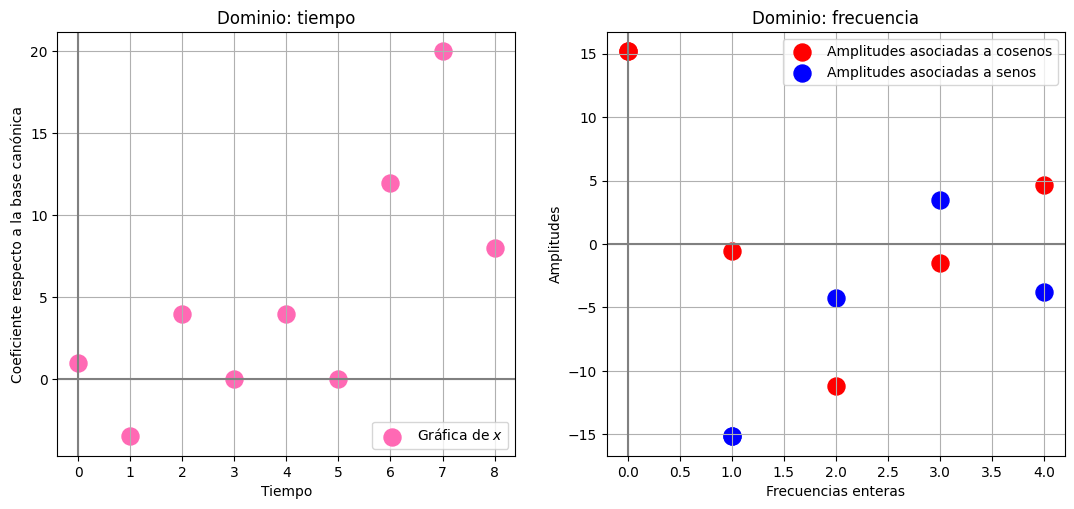

In [ ]:
def grafica_dominio_frecuencia(x):
  """
  'x' es un array de dimensión mayor a dos. 
  Esta función dibuja la gráfica de 'x' (como se definió en ??), que es una cuyo dominio es el tiempo, junto
  con la gráfica de los coeficientes de 'x' respecto a la BON de frecuencias Fn, que puede pensarse como una gráfica
  de 'x' cuyo dominio es la frecuencia.

  """
  fig, axis= plt.subplots(1,2)
  fig.set_size_inches(13, 5.5)
  n=len(x)
  M=math.ceil(n/2)
  dominio_tiempo=[t for t in range(n)]
  coef_cosenos, coef_senos=coeficientes_espectrales(x)

  #base_frecuencias=calculo_base(n)
  #coeficientes = [np.dot(x[i], base_frecuencias[i]) for i in range(n)]
  
  #dominio_frecuencias=[] esto úsalo cuando definas los coeficientes sigma.

  axis[0].scatter(dominio_tiempo, x, color=colores[4], s=150, label='Gráfica de $x$')
  axis[0].set_title('Dominio: tiempo')


  axis[1].set_title('Dominio: frecuencia')

  for i in range(M): #iteramos en las frecuencias
    axis[1].scatter(i, coef_cosenos[i], s=150, color='red')
    
  for i in range(M-1): #iteramos en las frecuencias
    axis[1].scatter(i+1, coef_senos[i], s=150, color='blue')

  #Dibujando etiquetas
  axis[1].scatter(0, coef_cosenos[0], s=150, color='red', label='Amplitudes asociadas a cosenos')
  axis[1].scatter(1, coef_senos[0], s=150, color='blue', label='Amplitudes asociadas a senos')

  if n%2==0:
    axis[1].scatter(M, coef_cosenos[M], s=150, color='red')

  axis[0].set_xlabel('Tiempo')
  axis[0].set_ylabel('Coeficiente respecto a la base canónica')
  axis[1].set_xlabel('Frecuencias enteras')
  axis[1].set_ylabel('Amplitudes')

  for i in range(2):
    axis[i].axhline(y=0, color='gray')
    axis[i].axvline(x=0, color='gray')
    axis[i].grid(True)
    axis[i].legend()

  return plt.show()


x=[1,-3.5,4,0,4,0,12,20,8]
grafica_dominio_frecuencia(x)

▶ Coeficientes sigma

Estos pueden pensarse como la cantidad total  que cada frecuencia aporta a x.

In [ ]:
def coeficientes_sigma(x):
  """
  En construcción. Estos coeficientes juntan la información de cosenos y senos de la misma
  frecuencia en un solo coeficiente.
  """
  n=len(x)
  M=math.ceil(n/2)

  coef_cosenos, coef_senos=coeficientes_espectrales(x)
  sigmas=[coef_cosenos[0]**2] #inicializamos la lista de sigmas con la primera entrada
  coef_cosenos.pop(0)
  
  if n%2==1:
    cuadrados_cosenos=np.square(coef_cosenos)
    cuadrados_senos=np.square(coef_senos)
    for i in range(M-1):
      sigmas.append(cuadrados_cosenos[i]+cuadrados_senos[i])
    return sigmas
  
  else:
    sigma_final=coef_cosenos[M-1]**2 #guardamos el último sigma
    coef_cosenos.pop(M-1)
    cuadrados_cosenos=np.square(coef_cosenos)
    cuadrados_senos=np.square(coef_senos)
    for i in range(M-1):
      sigmas.append(cuadrados_cosenos[i]+cuadrados_senos[i])
    sigmas.append(sigma_final)
    return sigmas

x=[1,5,2,-0.3,0,6,19,8]
print(len(x))
print(coeficientes_sigma(x))

#Nota que en efecto se cumple la identidad de Parseval.
print(sum(coeficientes_sigma(x)) )
print(np.dot(x, x)) 

8
[207.06124999999994, 148.45023080412753, 102.72250000000005, 31.494769195872493, 1.3612499999999987]
491.09000000000003
491.09000000000003


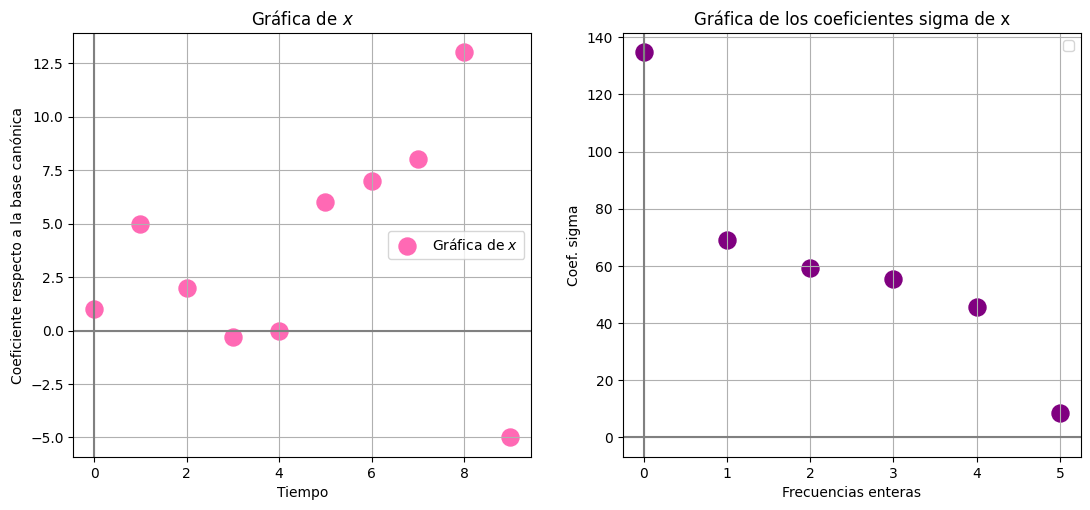

In [ ]:
def grafica_sigmas(x):
  """
  'x' es un array de dimensión mayor a dos. 
  Esta función dibuja la gráfica de 'x' (como se definió en ??), que es una cuyo dominio es el tiempo, junto
  con la gráfica de los coeficientes sigma de x.

  """
  fig, axis= plt.subplots(1,2)
  fig.set_size_inches(13, 5.5)
  n=len(x)

  dominio_tiempo=[t for t in range(n)]
  sigmas=coeficientes_sigma(x)
  cant_freq=len(sigmas)


  axis[0].scatter(dominio_tiempo, x, color=colores[4], s=150, label='Gráfica de $x$')
  axis[0].set_title('Gráfica de $x$')

  axis[1].set_title('Gráfica de los coeficientes sigma de x')
  for i in range(cant_freq):
    axis[1].scatter(i, sigmas[i], color='purple', s=150)


  axis[0].set_xlabel('Tiempo')
  axis[0].set_ylabel('Coeficiente respecto a la base canónica')
  axis[1].set_xlabel('Frecuencias enteras')
  axis[1].set_ylabel('Coef. sigma')

  for i in range(2):
    axis[i].axhline(y=0, color='gray')
    axis[i].axvline(x=0, color='gray')
    axis[i].grid(True)
    axis[i].legend()

  return plt.show()

x=[1,5,2,-0.3,0,6,7,8,13,-5]
grafica_sigmas(x)

In [ ]:
def esperanza(dominio, mediciones):
	"""
	Función que calcula la esperanza de la variable aleatoria cuyo dominio es la lista
	'dominio' y que toma los valores del vector 'mediciones'.
	Claro que se supone que las listas 'dominio' y 'mediciones' tienen la misma longitud,
	y que el i-ésimo valor de 'dominio' es mapeado al i-ésimo
	vector de 'mediciones'.'
	"""
	esp=0 #inicializamos la esperanza
	for i in range(len(dominio)):
		esp+=dominio[i]*mediciones[i]
	return esp